<a href="https://colab.research.google.com/github/Glitch0000/AutoEncoder_Simple_Example/blob/main/AutoEncoder_Simple_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder

 This simple autoencoder takes in three-dimensional data, encodes it to two dimensions, and decodes it back to 3D.

## Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Prepare and preview the dataset

We will first create a synthetic dataset to act as input to the autoencoder. We can do that with the function below.

In [ ]:
def generate_data(m):
    '''plots m random points on a 3D plane'''

    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m)/2
    data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
    data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)
    
    return data

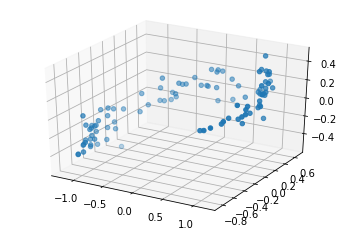

In [ ]:
# use the function above to generate data points
X_train = generate_data(100)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

# preview the data
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], cmap='Reds');

## Build the Model

**Now** we will build the simple encoder-decoder model. The model will contract in the encoder then expand in the decoder.

In [ ]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])

autoencoder = keras.models.Sequential([encoder, decoder])

## Compile the Model

We can then setup the model for training.

In [ ]:
autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.1))

## Train the Model

We will configure the training to also use the input data as our target output. In our example, that will be `X_train`.

In [ ]:
history = autoencoder.fit(X_train, X_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 3s 3ms/step - loss: 1.2569
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4911
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2631
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1633
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1090
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0741
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0611
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0489
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0452
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0438
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0397
Epoch 12/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0378
Epoch 13/200
4/4 [==============================] - 0s 2ms/st

## Plot the encoder output

we can use the encoder to compress the input to two dimensions.

In [ ]:
# encode the data
codings = encoder.predict(X_train)

# see a sample input-encoder output pair
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')

input point: [-1.04677244 -0.59361693 -0.37046166]
encoded point: [-0.02114782 -1.0040214 ]


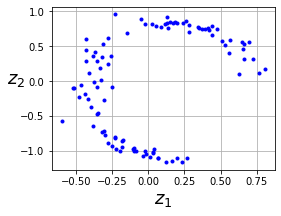

In [ ]:
# plot all encoder outputs
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

## Plot the Decoder output

The decoder then tries to reconstruct the original input. Although it is not perfect, it still follows the general shape of the original input.

In [ ]:
# decode the encoder output
decodings = decoder.predict(codings)

# see a sample output for a single point
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')
print(f'decoded point: {decodings[0]}')

input point: [-1.04677244 -0.59361693 -0.37046166]
encoded point: [-0.02114782 -1.0040214 ]
decoded point: [-1.0627526 -0.5443416 -0.2621529]


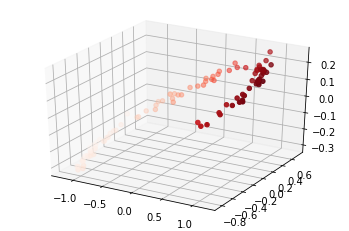

In [ ]:
# plot the decoder output
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:, 0], cmap='Reds');

That's it for this simple demonstration of the autoencoder!